### TODOs:
* Devolop methods for better testing

# Changelog
* Modified _save_heatmaps() to save images on disk. Now optimized and correct dimensions.
* Modified Pipeline.show_heatmap() to only show and not save
* Added PascalVoc and Imagenet datasets
* Added HeatmapDataset class (to be wrapped in dataloader with correct batch size)
* Changed biasedcifar10.py -> biased_datasets.py to include all datasets (included biased PascalVOC)
* Deleted non-biased datasets. Non biased is done by setting bias_method=None

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

%load_ext autoreload
%autoreload 2

import torch

import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim


from src.utils import *
from src.pipeline import Pipeline

import os

from sklearn.cluster import OPTICS, cluster_optics_dbscan

torch.Size([1, 1, 32, 32])
tensor([8])


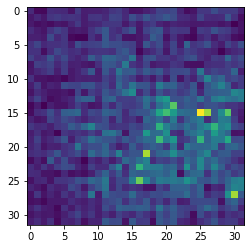

In [6]:
im, t = dataiter.next()
print(im.shape)
print(t)
image_to_show = np.transpose(im[0].cpu().detach().numpy(), (2, 1, 0)) #torch.transpose(im[0], [2, 1, 0])

plt.imshow(image_to_show)
plt.show()

In [2]:
min_samples = 20
xi=.05
min_cluster_size=.05
clust = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=min_cluster_size)

pip = Pipeline(dataset='CIFAR10', 
               dataloader='standard', 
               model='alexnet',
               device=torch.device("cuda"),
               biased_class=6,
               bias_method='box',
               explainer = 'saliency',
               clustering_method = clust)
#                heatmaps_path='/nas/data/nesti_pacini/HEATMAPS_DATASETS/cifar').run(

_ = pip.run()
# _ = pip.train(criterion = nn.CrossEntropyLoss())#, optimizer = optim.Adam(self.model.parameters(), lr=0.001))

Files already downloaded and verified
Files already downloaded and verified
[Epoch 1, batch   100] loss: 0.0153, accuracy 0.239
[Epoch 1, batch   200] loss: 0.0060, accuracy 0.309
[Epoch 1, batch   300] loss: 0.0037, accuracy 0.352
[Epoch 2, batch   100] loss: 0.0096, accuracy 0.523
[Epoch 2, batch   200] loss: 0.0046, accuracy 0.539
[Epoch 2, batch   300] loss: 0.0029, accuracy 0.551
[Epoch 3, batch   100] loss: 0.0081, accuracy 0.616
[Epoch 3, batch   200] loss: 0.0039, accuracy 0.621
[Epoch 3, batch   300] loss: 0.0026, accuracy 0.626
[Epoch 4, batch   100] loss: 0.0070, accuracy 0.673
[Epoch 4, batch   200] loss: 0.0034, accuracy 0.678
[Epoch 4, batch   300] loss: 0.0023, accuracy 0.679
[Epoch 5, batch   100] loss: 0.0061, accuracy 0.717
[Epoch 5, batch   200] loss: 0.0031, accuracy 0.715
[Epoch 5, batch   300] loss: 0.0021, accuracy 0.714
[Epoch 6, batch   100] loss: 0.0056, accuracy 0.741
[Epoch 6, batch   200] loss: 0.0028, accuracy 0.743
[Epoch 6, batch   300] loss: 0.0019, acc

In [ ]:
print(np.unique(pip.clusters))

In [ ]:
pip.show_heatmap(num=2, selected_class = 6, only_correct=True)

In [ ]:
pip.tsne(selected_class = 6, only_correct=True)

In [ ]:
min_samples = 20
xi=.05
min_cluster_size=.05
clust = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=min_cluster_size)

pip = Pipeline(dataset='CIFAR10', 
               dataloader='standard', 
               model='alexnet',
               device=torch.device("cuda"),
               biased_class=6,
               bias_method='box',
               explainer = 'saliency',
               clustering_method = clust)

pip = Pipeline(dataset='imagenet', 
               dataloader='standard', 
               model='alexnet',
               device=torch.device("cuda"),
               biased_class=0,
               bias_method='pad',
               explainer='lrp')
_ = pip.run()

In [ ]:
from imagenet_utils.imagenet_utils import VOC_MEAN
mu = np.array(VOC_MEAN).reshape((3, 1, 1)) #[[[VOC_MEAN[0]]], [[VOC_MEAN[1]]], [[VOC_MEAN[2]]]]
pip.show_heatmap(num=10, selected_class=0, only_correct=False, normalization=(mu, 255))